# FINAL PROJECT 1

## 1. Introduction

**Kelompok 2:**
<ol>
    <li>Mohammad Arkan - PYTN-KS16-09</li>
    <li>Jonathan Calvin Limawal - PYTN-KS16-019</li>
    <li>Desi Suci Nopianti - PYTN-KS16-025</li>
</ol>

# Project Overview

Dataset yang digunakan untuk tugas ini yaitu dataset publik dari keaggle yaitu Uber and Lyft Dataset Boston, MA. Dataset ini berisi informasi mengenai record transaksi perjalanan menggunakan taksi jenis uber dan lyft. Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan yang paling sesuai dengan mengimplementasikan analisa prediction menggunakan algoritma Linear Regression. Sebelum melakukan proses modeling menggunakan algoritma yang telah disebutkan sebelumnya, harus dilakukan pemilihan fitur yang tepat. Dataset ini memiliki dimensi yang tinggi dan atribut-atribut yang berkorelasi. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 5 atribut dari semuanya.

#### Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
<ol>
    <li>Mampu memahami konsep regression dengan Linear Regression.</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.</li>
    <li>Mampu mengimplementasikan Linear Regression untuk membuat prediksi.</li>
</ol>

# Instruksi Project

<ol>
    <li>Introduction</li>
    <li>Import Libraries</li>
    <li>Data Loading</li>
    <li>Data Cleaning</li>
    <li>Data Splitting</li>
    <li>Data Exploration</li>
    <li>Data Preprocessing</li>
    <li>Feature Scaling</li>
    <li>Model Development and Training</li>
    <li>Model Testing and Evaluation</li>
    <li>Conclusion</li>
</ol>

# Attribute Information

<ol>
    <li>id</li>
    <li>timestamp</li>
    <li>hour</li>
    <li>day</li>
    <li>month</li>
    <li>datetime</li>
    <li>source: destinasi awal</li>
    <li>destination: destinasi akhir</li>
    <li>cab_type: tipe transportasi (uber / lyft)</li>
    <li>… dan lainnya</li>
</ol>

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway
from scipy.special import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Data Loading

In [2]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

# Membaca dataset
rideShare_df = pd.read_csv('rideshare_kaggle.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
rideShare_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Menghitung jumlah baris dan kolom
rows, columns = rideShare_df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
693071 Rows
57 Columns


In [4]:
# Melihat statistik deskriptif dari data
rideShare_df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [5]:
# Melihat informasi tentang dataset
rideShare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## 4. Data Cleaning

In [6]:
# menampilkan jumlah missing value pada dataset
rideShare_df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat missing values pada kolom price pada dataset

In [7]:
rideShare_df.shape

(693071, 57)

In [8]:
# menghapus missing value pada kolom price
rideShare_df.dropna(inplace=True)

In [9]:
rideShare_df.shape

(637976, 57)

In [10]:
# menampilkan jumlah missing value pada dataset
rideShare_df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Sudah tidak terdapat missing values pada kolom price dalam dataset

In [11]:
# melihat apakah terdapat duplikat pada dataset
rideShare_df.duplicated().sum()

0

In [12]:
# melihat informasi dari dataset
rideShare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

## 5. Data Splitting

Tahap ini dilakukan sebelum EDA dan tahap-tahap selanjutnya untuk mencegah adanya/terjadinya **Data Leakage**.

In [13]:
train, test = train_test_split(rideShare_df, test_size=0.2, random_state=42)
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510380, 57)
Test set size: (127596, 57)


## 6. Data Exploration

### 6.1 Checking Price Column Distribution

Text(0.5, 1.0, 'Q-Q Plot')

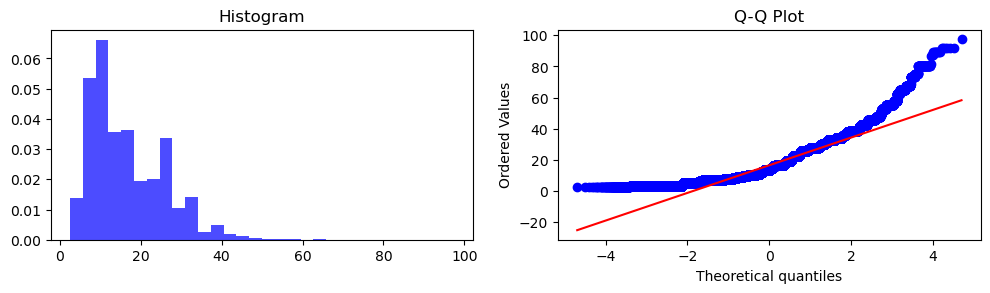

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(train['price'], bins=30, density=True, alpha=0.7, color='blue')
plt.title("Histogram")

plt.subplot(2, 2, 2)
stats.probplot(train['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot")

In [15]:
# Melakukan transformasi data menggunakan BoxCox Transformation, agar kolom 'price' mendekati distrbusi normal

train['price'], fitted_lambda = stats.boxcox(train['price'])
test['price'] = boxcox(test['price'], fitted_lambda)

### 6.2 Checking Price Column Distribution (After Transformation)

Text(0.5, 1.0, 'Q-Q Plot')

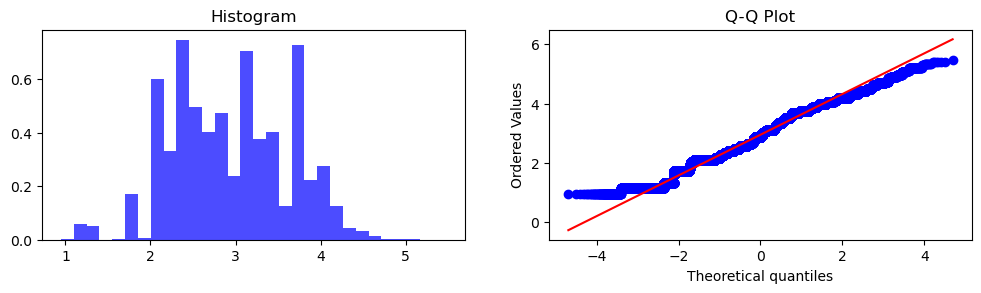

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(train['price'], bins=30, density=True, alpha=0.7, color='blue')
plt.title("Histogram")

plt.subplot(2, 2, 2)
stats.probplot(train['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot")

In [17]:
kurtosis = stats.kurtosis(train['price'])
skewness = stats.skew(train['price'])
print(f"Kurtosis: {kurtosis}, Skewness: {skewness}")

Kurtosis: -0.611782170244525, Skewness: -0.00855724307905458


### 6.3 Removing Outliers from Price Column

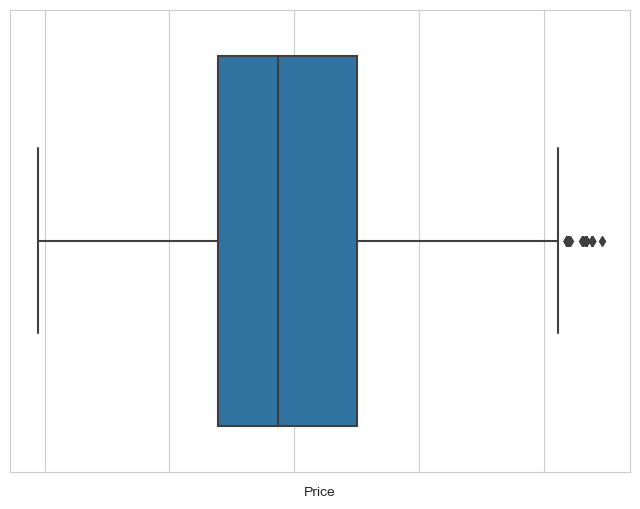

In [18]:
# melihat apakah terdapat outlier pada kolom price
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
boxplot = sns.boxplot(data=train, x='price')
plt.xlabel('Price')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [19]:
# Print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", train.shape)

# Kalkulasi batas atas dan bawah
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Menghapus outlier
train = train[(train['price'] >= lower) & (train['price'] <= upper)]

# Print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", train.shape)

Bentuk Shape Lama:  (510380, 57)
Bentuk Shape Baru:  (510308, 57)


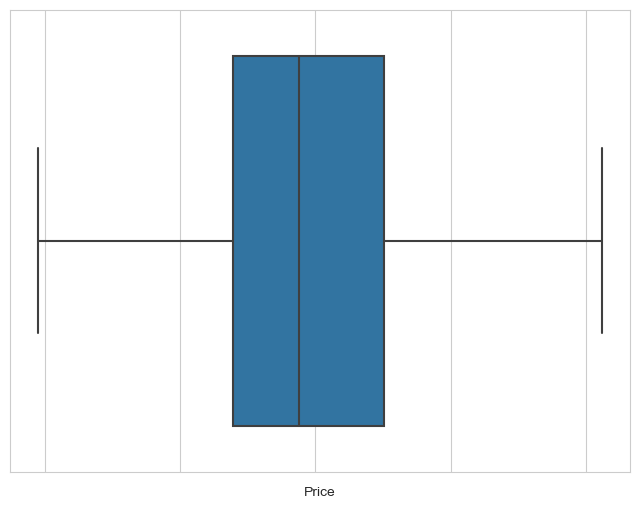

In [20]:
# melihat apakah terdapat outlier pada kolom price
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
boxplot = sns.boxplot(data=train, x='price')
plt.xlabel('Price')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

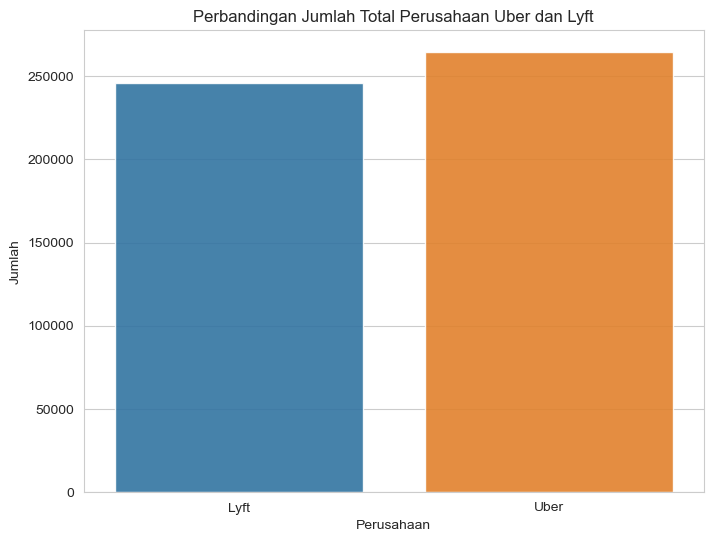

In [21]:
# memfilter dataset untuk Uber dan Lyft
train_cab = train.loc[(train['cab_type'] == 'Uber') | (train['cab_type'] == 'Lyft')]

# menghitung jumlah total perusahaan Uber dan Lyft
counts = train_cab.groupby('cab_type')['distance'].count()

# menampilkan grafik bar
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, alpha=0.9)
plt.title('Perbandingan Jumlah Total Perusahaan Uber dan Lyft')
plt.ylabel('Jumlah')
plt.xlabel('Perusahaan')
plt.show()

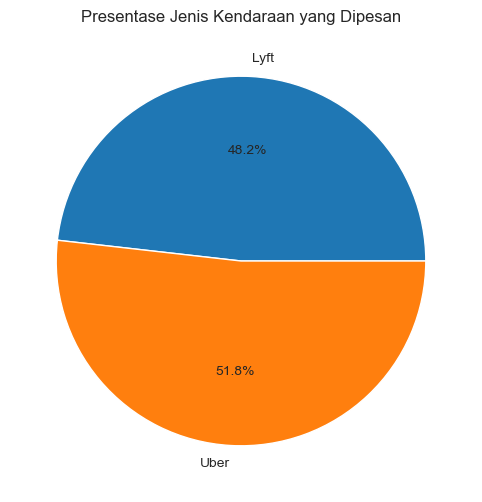

In [22]:
# menghitung jumlah total kendaraan yang dipesan untuk setiap jenis kendaraan
counts = train.groupby('cab_type')['distance'].count()

# menghitung presentase dari setiap jenis kendaraan
percentages = counts / counts.sum() * 100

# menampilkan grafik pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%')
plt.title('Presentase Jenis Kendaraan yang Dipesan')
plt.show()

In [23]:
# melihat informasi dari dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510308 entries, 141913 to 132473
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           510308 non-null  object 
 1   timestamp                    510308 non-null  float64
 2   hour                         510308 non-null  int64  
 3   day                          510308 non-null  int64  
 4   month                        510308 non-null  int64  
 5   datetime                     510308 non-null  object 
 6   timezone                     510308 non-null  object 
 7   source                       510308 non-null  object 
 8   destination                  510308 non-null  object 
 9   cab_type                     510308 non-null  object 
 10  product_id                   510308 non-null  object 
 11  name                         510308 non-null  object 
 12  price                        510308 non-null  float64

## 7. Data Preprocessing

### 7.1 Dropping Unrelated/Unused/Unnecessary Columns

In [24]:
columns_to_drop1 = ['timezone', 'product_id', 'id', 'timestamp', 'latitude', 'longitude', 'long_summary', 'datetime']
train = train.drop(columns=columns_to_drop1)
test = test.drop(columns=columns_to_drop1)

In [25]:
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 49)
Test set size: (127596, 49)


In [26]:
train.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
141913,9,2,12,South Station,Back Bay,Uber,UberX,2.389046,2.22,1.0,38.54,36.11,Light Rain,0.0308,1.00,0.93,3.53,3.98,1543755600,4.421,50.94,1543788000,44.88,1543816800,50.27,1543788000,45.53,1543816800,rain,36.81,1019.41,124,1.00,0,4.421,271.2,1543751796,1543785235,0.86,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
207434,21,14,12,Fenway,North Station,Lyft,Lux Black XL,3.979079,3.22,1.0,42.91,41.40,Mostly Cloudy,0.0000,0.00,0.66,3.25,4.37,1544846400,9.570,46.90,1544814000,40.75,1544835600,44.15,1544817600,38.71,1544835600,partly-cloudy-night,32.34,1029.10,186,0.73,0,9.570,290.2,1544789239,1544822023,0.24,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
524847,23,9,12,South Station,West End,Uber,Black SUV,3.809308,1.63,1.0,30.26,24.67,Clear,0.0000,0.00,0.58,5.40,6.25,1544371200,9.972,35.97,1544378400,21.91,1544443200,29.83,1544378400,19.40,1544439600,clear-night,17.19,1022.19,219,0.00,0,9.972,304.1,1544357000,1544389987,0.09,0.0003,1544374800,15.95,1544353200,35.97,1544378400,14.08,1544356800,29.83,1544378400
629294,2,27,11,South Station,Financial District,Lyft,Lux,2.627539,0.61,1.0,43.58,37.35,Rain,0.1299,1.00,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
5225,8,2,12,North Station,Northeastern University,Uber,UberX,2.571930,3.42,1.0,38.95,36.97,Possible Drizzle,0.0094,0.66,0.88,3.18,4.16,1543755600,6.572,50.94,1543788000,44.88,1543816800,50.27,1543788000,45.53,1543816800,rain,35.80,1020.00,139,1.00,0,6.572,270.1,1543751796,1543785235,0.86,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000


### 7.2 Feature Selection/Reduction (for temperature related columns)

In [27]:
temperature_column = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                      'apparentTemperatureLow', 'temperatureMin','temperatureHighTime','temperatureMax', 'temperatureLowTime',
                      'apparentTemperatureHighTime', 'apparentTemperatureLowTime','apparentTemperatureMin','apparentTemperatureMax',
                      'temperatureMinTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 
                      'apparentTemperatureMaxTime', 'price']

In [28]:
temp_df = train[temperature_column]
temp_df.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,apparentTemperatureMin,apparentTemperatureMax,temperatureMinTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
141913,38.54,36.11,50.94,44.88,50.27,45.53,36.40,1543788000,50.94,1543816800,1543788000,1543816800,35.78,50.27,1543726800,1543726800,1543788000,1543748400,1543788000,2.389046
207434,42.91,41.40,46.90,40.75,44.15,38.71,26.76,1544814000,46.90,1544835600,1544817600,1544835600,27.41,44.15,1544788800,1544788800,1544814000,1544788800,1544817600,3.979079
524847,30.26,24.67,35.97,21.91,29.83,19.40,15.95,1544378400,35.97,1544443200,1544378400,1544439600,14.08,29.83,1544353200,1544353200,1544378400,1544356800,1544378400,3.809308
629294,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,1543298400,1543251600,1543291200,36.20,43.92,1543233600,1543233600,1543251600,1543291200,1543251600,2.627539
5225,38.95,36.97,50.94,44.88,50.27,45.53,36.40,1543788000,50.94,1543816800,1543788000,1543816800,35.78,50.27,1543726800,1543726800,1543788000,1543748400,1543788000,2.571930


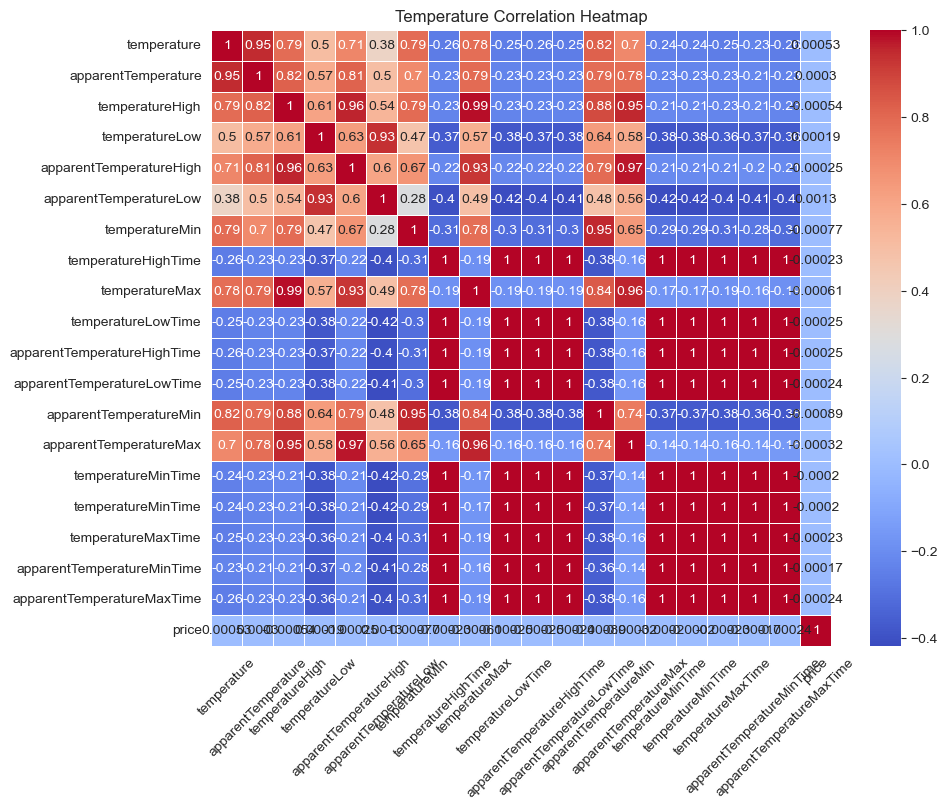

In [29]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Temperature Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [30]:
temperature_column = [col for col in temperature_column if col != 'price']
train = train.drop(columns=temperature_column, axis=1)
test = test.drop(columns=temperature_column, axis=1)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 31)
Test set size: (127596, 31)


In [31]:
train.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime
141913,9,2,12,South Station,Back Bay,Uber,UberX,2.389046,2.22,1.0,Light Rain,0.0308,1.00,0.93,3.53,3.98,1543755600,4.421,rain,36.81,1019.41,124,1.00,0,4.421,271.2,1543751796,1543785235,0.86,0.0894,1543770000
207434,21,14,12,Fenway,North Station,Lyft,Lux Black XL,3.979079,3.22,1.0,Mostly Cloudy,0.0000,0.00,0.66,3.25,4.37,1544846400,9.570,partly-cloudy-night,32.34,1029.10,186,0.73,0,9.570,290.2,1544789239,1544822023,0.24,0.0000,1544806800
524847,23,9,12,South Station,West End,Uber,Black SUV,3.809308,1.63,1.0,Clear,0.0000,0.00,0.58,5.40,6.25,1544371200,9.972,clear-night,17.19,1022.19,219,0.00,0,9.972,304.1,1544357000,1544389987,0.09,0.0003,1544374800
629294,2,27,11,South Station,Financial District,Lyft,Lux,2.627539,0.61,1.0,Rain,0.1299,1.00,0.94,11.98,11.98,1543291200,4.786,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600
5225,8,2,12,North Station,Northeastern University,Uber,UberX,2.571930,3.42,1.0,Possible Drizzle,0.0094,0.66,0.88,3.18,4.16,1543755600,6.572,rain,35.80,1020.00,139,1.00,0,6.572,270.1,1543751796,1543785235,0.86,0.0894,1543770000


### 7.3 Feature Selection/Reduction (for climate related columns)

In [32]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGustTime', 'sunriseTime',
                  'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'sunsetTime', 'uvIndexTime',
                  'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'visibility.1',
                  'precipIntensityMax','price']

In [33]:
temp_df = train[climate_column]
temp_df.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGustTime,sunriseTime,windGust,visibility,dewPoint,pressure,windBearing,sunsetTime,uvIndexTime,cloudCover,uvIndex,ozone,moonPhase,visibility.1,precipIntensityMax,price
141913,0.0308,1.00,0.93,3.53,1543755600,1543751796,3.98,4.421,36.81,1019.41,124,1543785235,1543770000,1.00,0,271.2,0.86,4.421,0.0894,2.389046
207434,0.0000,0.00,0.66,3.25,1544846400,1544789239,4.37,9.570,32.34,1029.10,186,1544822023,1544806800,0.73,0,290.2,0.24,9.570,0.0000,3.979079
524847,0.0000,0.00,0.58,5.40,1544371200,1544357000,6.25,9.972,17.19,1022.19,219,1544389987,1544374800,0.00,0,304.1,0.09,9.972,0.0003,3.809308
629294,0.1299,1.00,0.94,11.98,1543291200,1543232969,11.98,4.786,41.83,1003.97,90,1543266992,1543251600,1.00,0,291.1,0.64,4.786,0.1300,2.627539
5225,0.0094,0.66,0.88,3.18,1543755600,1543751796,4.16,6.572,35.80,1020.00,139,1543785235,1543770000,1.00,0,270.1,0.86,6.572,0.0894,2.571930


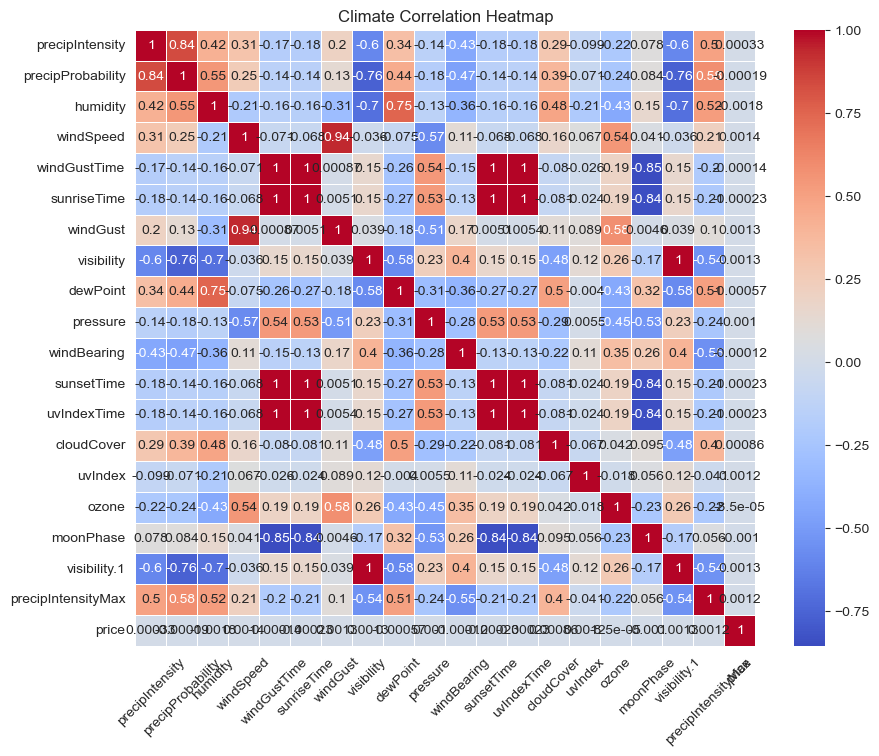

In [34]:
correlation_matrix = temp_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Climate Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [35]:
climate_column = [col for col in climate_column if col != 'price']
train = train.drop(columns=climate_column, axis=1)
test = test.drop(columns=climate_column, axis=1)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 12)
Test set size: (127596, 12)


### 7.4 Feature Selection/Reduction (for time related columns)

In [36]:
train['month'].unique()

array([12, 11], dtype=int64)

Kolom 'month' hanya memiliki 2 nilai. Hal ini menandakan bahwa kolom 'month' kurang berarti di kasus/model ini. Oleh karena itu, kami memutuskan untuk **tidak menggunakan (*drop*) kolom 'month'.**

In [37]:
train = train.drop(columns='month')
test = test.drop(columns='month')

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 11)
Test set size: (127596, 11)


### 7.4.1 Feature Engineering on Hour-Day Column

In [38]:
def segment_hour(hour):
    if 0 <= hour <= 5:
        return 'Dawn'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 11 <= hour <= 15:
        return 'Mid-day'
    elif 15 <= hour <= 18:
        return 'Afternoon'
    else:
        return 'Night'

def segment_day(day):
    if 1 <= day <= 14:
        return 'First Half'
    else:
        return 'Second Half'

train['hour'] = train['hour'].apply(segment_hour)
train['day'] = train['day'].apply(segment_day)

test['hour'] = test['hour'].apply(segment_hour)
test['day'] = test['day'].apply(segment_day)

In [39]:
train['time'] = train['hour'] + '_' + train['day']
train = train.drop(columns=['hour', 'day'])

test['time'] = test['hour'] + '_' + test['day']
test = test.drop(columns=['hour', 'day'])

In [40]:
time_column = ['time', 'price']

In [41]:
temp_df = train[time_column]
temp_df.head()

,time,price
141913,Morning_First Half,2.389046
207434,Night_First Half,3.979079
524847,Night_First Half,3.809308
629294,Dawn_Second Half,2.627539
5225,Morning_First Half,2.571930


### 7.4.2 ANOVA for Time (Hour + Day) Column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'time' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'time' dan 'price'.

&alpha; = 0.05

In [42]:
time_group = temp_df['time'].unique()
grouped_data = [temp_df['price'][temp_df['time'] == group] for group in time_group]
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.7017871220274708
p-value: 0.7079132561370438


Dengan &alpha; = 0.05, terlihat bahwa p-value > &alpha;. Hal ini menandakan bahwa **tidak ada korelasi yang signifikan** antara 'time' dan 'price'. Oleh karena itu, kita dapat men-*drop* kolom 'time'

In [43]:
train = train.drop(columns='time')
test = test.drop(columns='time')

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 9)
Test set size: (127596, 9)


### 7.5 Feature Selection/Reduction (for categorical columns)

In [44]:
cat_column = ['source', 'destination', 'name','cab_type', 'icon', 'short_summary', 'price' ]

In [45]:
temp_df = train[cat_column]
temp_df.head()

,source,destination,name,cab_type,icon,short_summary,price
141913,South Station,Back Bay,UberX,Uber,rain,Light Rain,2.389046
207434,Fenway,North Station,Lux Black XL,Lyft,partly-cloudy-night,Mostly Cloudy,3.979079
524847,South Station,West End,Black SUV,Uber,clear-night,Clear,3.809308
629294,South Station,Financial District,Lux,Lyft,rain,Rain,2.627539
5225,North Station,Northeastern University,UberX,Uber,rain,Possible Drizzle,2.571930


### 7.5.1 Feature Engineering on Souce-Destination Column

In [46]:
temp_df['source'].unique()

array(['South Station', 'Fenway', 'North Station', 'West End',
       'Boston University', 'Beacon Hill', 'Financial District',
       'Northeastern University', 'Haymarket Square', 'Theatre District',
       'North End', 'Back Bay'], dtype=object)

In [47]:
temp_df['destination'].unique()

array(['Back Bay', 'North Station', 'West End', 'Financial District',
       'Northeastern University', 'South Station', 'Haymarket Square',
       'Beacon Hill', 'Boston University', 'North End',
       'Theatre District', 'Fenway'], dtype=object)

In [48]:
temp_df['source_destination'] = temp_df['source'] + ' to ' + temp_df['destination']

train['source_destination'] = train['source'] + ' to ' + train['destination']
test['source_destination'] = test['source'] + ' to ' + test['destination']

In [49]:
cat_column = ['source', 'destination', 'name','cab_type', 'icon', 'short_summary', 'price', 'source_destination']

### 7.5.2 ANOVA for short_summary column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'short_summary' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'short_summary' dan 'price'.

&alpha; = 0.05

In [50]:
grouped = temp_df.groupby('short_summary')

prices = [group['price'].values for name, group in grouped]

f_val, p_val = f_oneway(*prices)

print('F-value:', f_val)
print('P-value:', p_val)

F-value: 0.7409463522710433
P-value: 0.6553448293378128


### 7.5.3 ANOVA for icon column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'icon' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'icon' dan 'price'.

&alpha; = 0.05

In [51]:
grouped = temp_df.groupby('icon')

prices = [group['price'].values for name, group in grouped]

f_val, p_val = f_oneway(*prices)

print('F-value:', f_val)
print('P-value:', p_val)

F-value: 1.0232382830942377
P-value: 0.4077552612578443


### 7.5.4 ANOVA for source_destination column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'source_destination' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'source_destination' dan 'price'.

&alpha; = 0.05

In [52]:
grouped = temp_df.groupby('source_destination')

prices = [group['price'].values for name, group in grouped]

f_val, p_val = f_oneway(*prices)

print('F-value:', f_val)
print('P-value:', p_val)

F-value: 936.3919378440906
P-value: 0.0


### 7.5.5 ANOVA for cab_type column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'cab_type' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'cab_type' dan 'price'.

&alpha; = 0.05

In [53]:
grouped = temp_df.groupby('cab_type')

prices = [group['price'].values for name, group in grouped]

f_val, p_val = f_oneway(*prices)

print('F-value:', f_val)
print('P-value:', p_val)

F-value: 1113.2096841207858
P-value: 8.158362432855287e-244


### 7.5.6 ANOVA for name column

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom 'name' dan 'price'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom 'name' dan 'price'.

&alpha; = 0.05

In [54]:
grouped = temp_df.groupby('name')

prices = [group['price'].values for name, group in grouped]

f_val, p_val = f_oneway(*prices)

print('F-value:', f_val)
print('P-value:', p_val)

F-value: 198773.96980184052
P-value: 0.0


Untuk hasil ANOVA pada kolom-kolom di atas, jika p-value > 0.05 (alfa),  hal ini menandakan bahwa tidak ada perbedaan yang signifikan antara kolom tersebut dan 'price'. Oleh karena itu, kita dapat men-drop kolom **'icon'** dan **'short_summary'**.

In [55]:
cat_column = [col for col in cat_column if col not in ['price', 'cab_type', 'name', 'source_destination']]
train = train.drop(columns=cat_column)
test = test.drop(columns=cat_column)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 6)
Test set size: (127596, 6)


### 7.6 Checking distance and surge_multiplier column correlation with price column

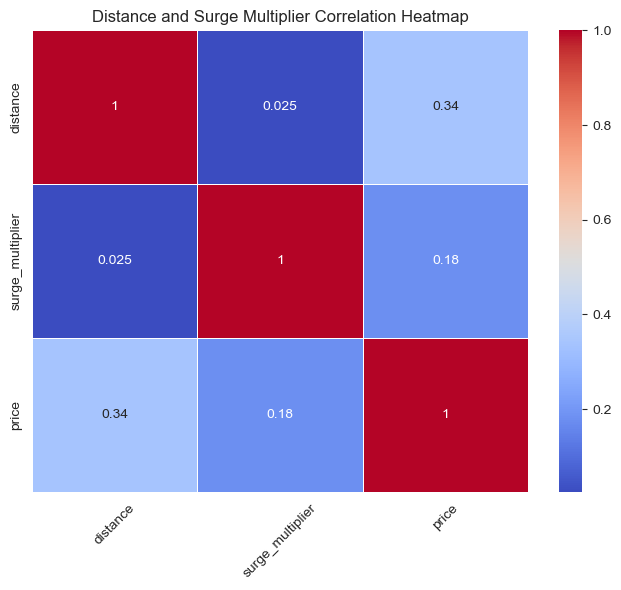

In [56]:
column = ['distance', 'surge_multiplier', 'price']
temp_df = train[column]

correlation_matrix = temp_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Distance and Surge Multiplier Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

Hasil korelasi di atas menunjukkan bahwa kolom **'distance'** dan **'surge_multiplier'** memiliki korelasi yang cukup besar terhadap kolom price. Oleh karena itu, kedua kolom tersebut perlu di-*keep* (tidak di-*drop*).

### 7.7 Final Columns

In [57]:
train.head()

,cab_type,name,price,distance,surge_multiplier,source_destination
141913,Uber,UberX,2.389046,2.22,1.0,South Station to Back Bay
207434,Lyft,Lux Black XL,3.979079,3.22,1.0,Fenway to North Station
524847,Uber,Black SUV,3.809308,1.63,1.0,South Station to West End
629294,Lyft,Lux,2.627539,0.61,1.0,South Station to Financial District
5225,Uber,UberX,2.571930,3.42,1.0,North Station to Northeastern University


In [58]:
average_prices = train.groupby(['cab_type', 'distance', 'surge_multiplier', 'name'])['price'].mean()
average_prices.reset_index()
pd.set_option('display.max_rows', None)

print(average_prices)

cab_type  distance  surge_multiplier  name        
Lyft      0.39      1.00              Lux             2.599735
                                      Lux Black       3.120543
                                      Lux Black XL    3.729520
                                      Lyft            2.104864
                                      Lyft XL         2.394761
                                      Shared          1.655677
                    1.25              Lux             2.874670
                                      Lux Black       3.507931
                                      Lyft            2.389046
                                      Lyft XL         2.571930
                    1.50              Lux             2.874670
                                      Lux Black       3.507931
                                      Lux Black XL    4.200566
                                      Lyft            2.571930
                                      Lyft XL         2.571930
    

### 7.8 One-Hot Encoding

In [59]:
train = pd.get_dummies(train, columns=['cab_type', 'name', 'source_destination'], 
                              prefix=['cab_type', 'name', 'source_destination'])

test = pd.get_dummies(test, columns=['cab_type', 'name', 'source_destination'], 
                              prefix=['cab_type', 'name', 'source_destination'])

train = train.drop(columns='cab_type_Lyft')
test = test.drop(columns='cab_type_Lyft')

In [60]:
train.head()

,price,distance,surge_multiplier,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,source_destination_Back Bay to Boston University,source_destination_Back Bay to Fenway,source_destination_Back Bay to Haymarket Square,source_destination_Back Bay to North End,source_destination_Back Bay to Northeastern University,source_destination_Back Bay to South Station,source_destination_Beacon Hill to Boston University,source_destination_Beacon Hill to Fenway,source_destination_Beacon Hill to Haymarket Square,source_destination_Beacon Hill to North End,source_destination_Beacon Hill to Northeastern University,source_destination_Beacon Hill to South Station,source_destination_Boston University to Back Bay,source_destination_Boston University to Beacon Hill,source_destination_Boston University to Financial District,source_destination_Boston University to North Station,source_destination_Boston University to Theatre District,source_destination_Boston University to West End,source_destination_Fenway to Back Bay,source_destination_Fenway to Beacon Hill,source_destination_Fenway to Financial District,source_destination_Fenway to North Station,source_destination_Fenway to Theatre District,source_destination_Fenway to West End,source_destination_Financial District to Boston University,source_destination_Financial District to Fenway,source_destination_Financial District to Haymarket Square,source_destination_Financial District to North End,source_destination_Financial District to Northeastern University,source_destination_Financial District to South Station,source_destination_Haymarket Square to Back Bay,source_destination_Haymarket Square to Beacon Hill,source_destination_Haymarket Square to Financial District,source_destination_Haymarket Square to North Station,source_destination_Haymarket Square to Theatre District,source_destination_Haymarket Square to West End,source_destination_North End to Back Bay,source_destination_North End to Beacon Hill,source_destination_North End to Financial District,source_destination_North End to North Station,source_destination_North End to Theatre District,source_destination_North End to West End,source_destination_North Station to Boston University,source_destination_North Station to Fenway,source_destination_North Station to Haymarket Square,source_destination_North Station to North End,source_destination_North Station to Northeastern University,source_destination_North Station to South Station,source_destination_Northeastern University to Back Bay,source_destination_Northeastern University to Beacon Hill,source_destination_Northeastern University to Financial District,source_destination_Northeastern University to North Station,source_destination_Northeastern University to Theatre District,source_destination_Northeastern University to West End,source_destination_South Station to Back Bay,source_destination_South Station to Beacon Hill,source_destination_South Station to Financial District,source_destination_South Station to North Station,source_destination_South Station to Theatre District,source_destination_South Station to West End,source_destination_Theatre District to Boston University,source_destination_Theatre District to Fenway,source_destination_Theatre District to Haymarket Square,source_destination_Theatre District to North End,source_destination_Theatre District to Northeastern University,source_destination_Theatre District to South Station,source_destination_West End to Boston University,source_destination_West End to Fenway,source_destination_West End to Haymarket Square,source_destination_West End to North End,source_destination_West End to Northeastern University,source_destination_West End to South Station
141913,2.389046,2.22,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [61]:
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (510308, 88)
Test set size: (127596, 88)


In [62]:
X_train = train.drop('price', axis=1) 
y_train = train['price']

X_test = test.drop('price', axis=1) 
y_test = test['price']

## 8. Feature Scaling

In [63]:
scaler = MinMaxScaler()

X_train[['distance', 'surge_multiplier']] = scaler.fit_transform(X_train[['distance', 'surge_multiplier']])
X_test[['distance', 'surge_multiplier']] = scaler.transform(X_test[['distance', 'surge_multiplier']])

## 9. Model Development and Training

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 10. Model Testing and Evaluation

In [65]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Nilai MSE dari model Regresi Linear sebesar: {:.3f}".format(mse))
print("Nilai R-squared dari model Regresi Linear sebesar: {:.3f}".format(r2))

Nilai MSE dari model Regresi Linear sebesar: 0.026
Nilai R-squared dari model Regresi Linear sebesar: 0.946


## Conclusion

Dari nilai MSE dan R-squared, terlihat bahwa **model Regresi Linear yang telah dibuat sudah bagus/baik**. Hal ini ditandai dengan nilai R-squared yang cukup tinggi, yakni sebesar 0.946, dan nilai MSE yang cukup rendah, yakni hanya 0.026.

Selain itu, dari hasil *feature selection/reduction*, terlihat bahwa **ada 5 kolom (*feature*)** yang paling mempengaruhi harga (price), yakni 'cab_type', 'name', 'distance', 'surge_multiplier', dan 'source-destination'.

Kemudian, dari tabel di bagian 7.7 Final Columns, terlihat bahwa:
1. Makin jauh jarak tempuh (*distance*) makin mahal harganya (*price*).
2. Makin tinggi nilai 'surge_multiplier' makin mahal harganya (*price*).
3. Makin besar ukuran dari jenis Uber/Lyft makin mahal harganya (*price*).